## Scaling and Transforming Data

### Apples to Oranges: Comparing Test Scores

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Let's say we're trying to compare how students perform on college entrance exams at two different high 
#schools in the US. One is in California, where a large majority of their students tend to take the SAT, and 
#the other is in Illinois, where students favor taking the ACT. Is there anyway we see how well these school 
#stack up to one another?

#Sunnydale High vs. Shermer High 
SAT_scores = [690, 330, 600, 350, 540, 440, 650, 480, 570, 420, 360, 620, 580, 600,
 390, 420, 510, 640, 350, 470, 570, 430, 410, 420, 380, 420, 510, 620,
 470, 700, 520, 560, 480, 540, 450, 550, 520, 460, 410, 550, 400, 350,
 780, 590, 510, 410, 520, 340, 430, 370, 560, 560, 500, 560, 490, 550,
 430, 520, 710, 520, 460, 390, 550, 410, 480, 450, 520, 610, 380, 620,
 530, 460, 460, 660, 520, 580, 490, 560, 520, 380, 440, 610, 530, 350,
 630, 440, 450, 590, 430, 640, 500, 290, 560, 390, 320, 470, 700, 540,
 440, 550]
ACT_scores = [24, 18, 32, 23, 22, 26, 18, 23, 17, 28, 15, 20, 20, 17, 19, 24, 17, 29,
 21, 31, 22, 13, 17, 17, 26, 16, 25, 30, 26, 14, 14, 22, 14, 29, 26, 27,
 25, 20, 19, 17, 31, 20, 20, 25, 19, 24, 23, 24, 24, 23, 17, 18, 21, 26,
 21, 21, 28, 22, 22, 21, 18, 10, 16, 25, 31, 23, 24, 18, 28, 18, 20, 23,
 22, 17, 16, 17, 29, 25, 18, 19, 20, 22, 29, 18, 17, 24, 15, 33, 30, 17,
 11, 25, 24, 20, 21, 21, 29, 25, 22, 18]

columns = ["SAT", "ACT"]
score_df = pd.DataFrame(np.array([SAT_scores, ACT_scores]).T, columns=columns)
print(score_df.head())

/data1/home/liwarren/.local/share/virtualenvs/jupyter-crdWG09F/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/data1/home/liwarren/.local/share/virtualenvs/jupyter-crdWG09F/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


   SAT  ACT
0  690   24
1  330   18
2  600   32
3  350   23
4  540   22


### What is a transformation?

In [3]:
#To do this, we're going to need to transform the data in some way. Specifically, when I talk about a 
#transformation, all that means is that we're going to apply some function f(x) to each input, and get our 
#new outputs. Which means, something as simple as x + 0 counts as a transformation, as does the much more 
#complicated expression below. 

$$ \hat{f}(k) = \int_{-\infty}^{\infty}f(x) e^{-2\pi i kx} dx $$

In [4]:
#Of course, adding zero isn't a particularly *useful* transformation. As for the second one, it's certainly 
#useful, but not something you'll have to worry about in this course. I'll be sure to point out all the 
#essential transformations you're going to run across when reading other peoples' analyses, and provide you
#with the tools necessary to get started on your own. Now, relating transformations back to our original 
#question regarding test scores...

### Scaling Techniques

Max-Min Normalization

$$ x' = \frac{x-\min(x)}{\max(x)-\min(x)} $$

Standardization (z-score)

$$ x' = \frac{x - \mu}{\sigma} $$

(array([ 3.,  7., 11., 15., 12., 15., 16.,  8.,  7.,  2.,  3.,  1.]),
 array([-2.21495327, -1.83333333, -1.4517134 , -1.07009346, -0.68847352,
        -0.30685358,  0.07476636,  0.45638629,  0.83800623,  1.21962617,
         1.60124611,  1.98286604,  2.36448598]),
 <a list of 12 Patch objects>)

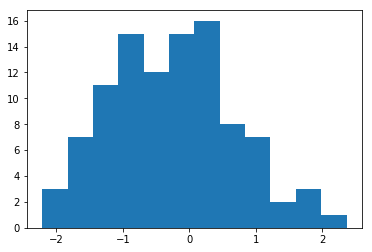

In [5]:
#We see that the difficulty comes from having two different measures. Scaling allows us to use the same 
#measuring stick and start to draw some conclusions based on the data. One way of scaling the data is to use 
#max-min normalization, which transforms all our values between 0 and 1. However, in our particular case, it
#might be more helpful to look at standardization, or in other words, to compute z-scores. Recall that this 
#just captures the difference between your data point and the mean, relative to the spread of the overall 
#distribution. [read out formula]

#Now let's go ahead and pause for a quick refresher. Try your hand at calculating z-scores.
#QUIZ: Hand-compute max-min/z-score

#In our case, instead of computing mu and sigma for the scores provided, we've looked up the national 
#averages and standard deviations for both exams so that we can benchmark each school relative to the 
#rest of the country. 

#2017 data obtained from https://nces.ed.gov/programs/digest/current_tables.asp (Tables 226.XX)
SAT_mean = 527
SAT_sd = 107

ACT_mean = 20.7
ACT_sd = 5.5

SAT_norm = (score_df['SAT'] - SAT_mean) / SAT_sd
ACT_norm = (score_df['ACT'] - ACT_mean) / ACT_sd
normalized_df = pd.DataFrame({'SAT': SAT_norm, 'ACT': ACT_norm})

plt.hist(normalized_df['SAT'], bins=12)

#Even though we haven't discussed histograms yet, we can still get a vague sense of what's going on here. 
#Specifically, note that it somewhat resembles a normal distribution: 
#with a hump--somewhat left of center--that tails off on both ends. 

#Now let's go ahead and pause for a quick refresher. Try your hand at calculating z-scores.
#QUIZ: Code something: max-min/z-score

(array([ 2.,  1.,  5., 14., 13., 15., 14., 15.,  6.,  8.,  5.,  2.]),
 array([-1.94545455, -1.5969697 , -1.24848485, -0.9       , -0.55151515,
        -0.2030303 ,  0.14545455,  0.49393939,  0.84242424,  1.19090909,
         1.53939394,  1.88787879,  2.23636364]),
 <a list of 12 Patch objects>)

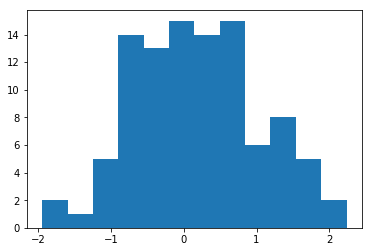

In [6]:
plt.hist(normalized_df['ACT'], bins=12)

In [7]:
#As we can see, the distribution from Shermer High seems to be shifted to the right ever so slightly when 
#compared to Sunnydale from before. However, just to make sure, let's print out some centrality measures. 

print("Sunnydale Mean:", normalized_df['SAT'].mean())
print("Sunnydale Median:", normalized_df['SAT'].median())

print("Shermer Mean:", normalized_df['ACT'].mean())
print("Shermer Median:", normalized_df['ACT'].median())

#Indeed, both the mean and median for Shermer High are greater than those for Sunnydale, which matches our 
#intuition. Admittedly, this isn't very rigorous, but it does show how a simple transformation combined 
#with some basic visual exploration is an effective way of getting some quick insights from your data. At 
#the end of this module, we'll take a look at some procedures to more confidently answer similar questions
#using grounded statistical techniques. 

Sunnydale Mean: -0.2542056074766355
Sunnydale Median: -0.20560747663551399
Shermer Mean: 0.18363636363636374
Shermer Median: 0.1454545454545456


### Other Transformations: Why do it?

<BarContainer object of 42 artists>

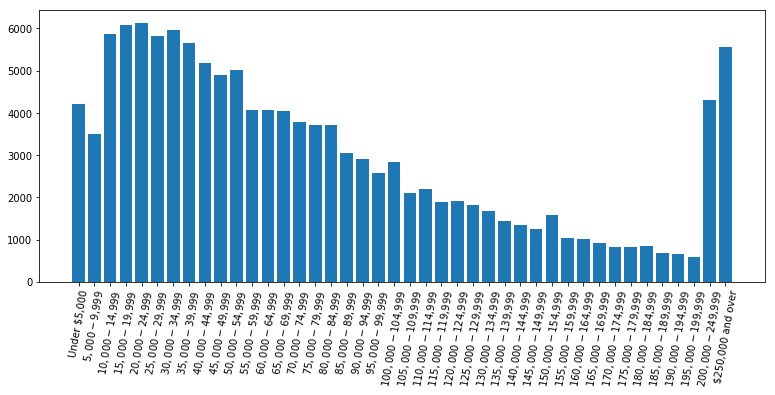

In [8]:
#Of course, while we can standardize data, this doesn't necessarily mean that result will actually follow a 
#bell curve if the data aren't normal to begin with. This can pose a challenge when we want to apply 
#statistical tools that assume some degree of normality such as z or t-tests. Fortunately, transformations 
#can help us address this issue as well. 
#To illustrate, we'll use income distribution data from the 2017 US census. 

#2017 data obtained from US Census Bureau: Table A-1
#(https://www.census.gov/data/tables/2018/demo/income-poverty/p60-263.html)
N_households = 127586000
income_df = pd.read_csv('income_dist_2017.csv')

axis = plt.figure(figsize=(13,5))
plt.xticks(rotation=80)
plt.bar(income_df['Range'], income_df['Households'])

#Now, there are few interesting features we can observe here. First of all, notice that this distribution is 
#positively, or right, skewed because it *tails* off to the right. With that said, the two bars at the very 
#end seem a bit out of place. Why is this? Well, each range only spans $5,000, for instance, $35,000 to 
#$39,999. However, the second to last bin is from $200,000 to $249,999, while $250,000 on up includes 
#millionaires and billionaires. Though, if we did continue to segement out in $5,000 increments, we might 
#expect to see a similar decreasing trend.

In [9]:
#For now though, just to keep things simple, let's go ahead and drop those last two bars. Also, just so that 
#we have integer values on the x-axis to run a transformation, let's just take the midpoint of each bin. 

income_df = income_df.drop([40, 41])
print(income_df['Midpoints'].head())

0     2500
1     7500
2    12500
3    17500
4    22500
Name: Midpoints, dtype: int64


<BarContainer object of 40 artists>

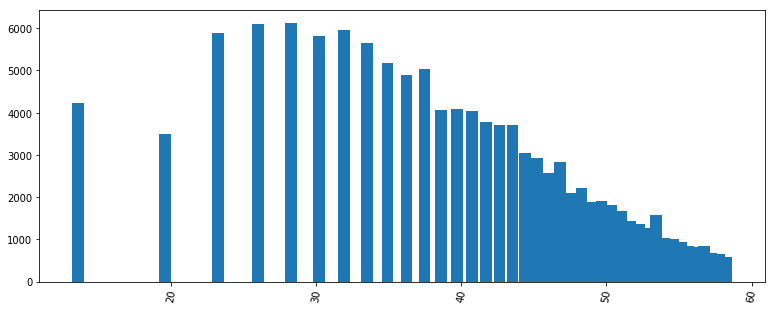

In [24]:
#Since the data is right skewed, we can use a square-root transformation, or a cube-root transformation. 

income_df['Transform'] = np.power(income_df['Midpoints'], (1/3))

plt.figure(figsize=(13,5))
plt.xticks(rotation=80)
plt.bar(income_df['Transform'], income_df['Households'])

#...and you'll see that the plot looks a lot closer to a normal distribution! Even though this does have the 
#effect of "compressing" some of our points along the right-hand side and creating "gaps" towards the left, 
#this is just because we were given the household counts at specific midpoint values instead of actual data
#points, which would resemble something more continuous. We could also try using a histogram, which Nia/I 
#will delve into in week 2. 

<BarContainer object of 13 artists>

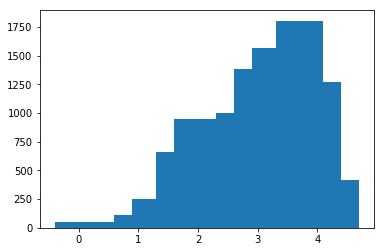

In [11]:
#Now for a follow-up question: what if we have something that is left skewed?
#Here are data obtained from UMich's Acadmeic Reporting Tools (art.ai.umich.edu) for EECS 1281: 
#Data Structures and Algorithms. Note that we changed the final grades (A+, A, A- all the way down to E) 
#into their corresponding grade points instead, where we've assigned A+ as 4.3 to see a difference 
#(even though both A+ and A's are typically counted as a 4.0).

N_students = 10312
grade_labels = [0, 0.7, 1.0, 1.3, 1.7, 2.0, 2.3, 2.7, 3.0, 3.3, 3.7, 4.0, 4.3]
percentages = [0.5, 0.5, 1.1, 2.4, 6.4, 9.2, 7.9, 9.7, 13.4, 15.2, 17.5, 12.3, 4.0]
counts = [(x / 100) * N_students for x in percentages]
plt.bar(grade_labels, counts)

#QUIZ: show a plot, check all that apply: which transformations might be helpful to reduce skewness?

[0.         0.01855057 0.05408329 0.11882098 0.2657112  0.43266631
 0.65803137 1.06452136 1.46024878 1.94359113 2.7394808  3.46133045
 4.3       ]


<BarContainer object of 13 artists>

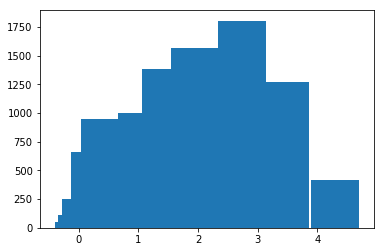

In [12]:
#Since we took roots for positively-skewed data, it might not be surprising that for negative-skewed data, 
#we just perform the inverse operation. So, instead of taking a cube root, we'll raise the grade labels to 
#the third power. 

transformed_grades = np.power(grade_labels, 3)
transformed_grades = (transformed_grades/max(transformed_grades)) * 4.3
print(transformed_grades)
plt.bar(transformed_grades, counts)

#See how we've "curved" the grades? Rest assured, there won't be any curving in this course, but even if 
#there were, we certainly wouldn't be dragging scores downwards!

### Linearity

In [13]:
#Let's look at another reason for why we might want to transform data. Before we dive into the example, we'll
#give you a bit of background knowledge about Newton's second law of motion, which states that force is equal
#to mass times acceleration. Rearranging, we see that a = F / m. In other words, the faster you want something 
#to accelerate, the more force you'll need to apply. And, if you're pushing or pulling with a constant force, 
#then the more mass an object has, the more it will resist motion (or have a smaller acceleration). 

$$ F = ma \implies a = \frac{F}{m}$$

In [14]:
#Now, what I've mentioned probably aligns with your intuition and isn't very shocking, but let's see what 
#insights we can gain from this relatively simple equation. To help us out, let's turn to a popular Canadian 
#sport: curling. 

![curling](Curling_Canada_Torino_2006.jpg)

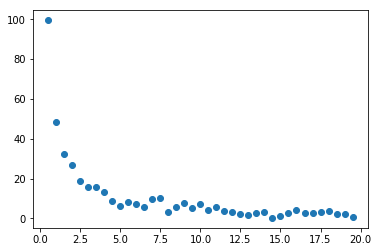

In [15]:
#Say we've given some curlers custom curling stones with various weights ranging from half a kilogram to 
#20 kilos, have them apply a (roughly) constant force, and then measure the acceleration using some 
#photosensors. Let's plot the results below:

mass = np.arange(0.5, 20, 0.5)
acceleration = [99.53, 48.67, 32.21, 26.64, 18.63, 15.92, 15.85, 13.27, 8.57, 6.33, 8.12, 7.12, 5.77, 9.94, 10.3, 3.07, 
                5.87, 7.69, 5.49, 7.24, 4.45, 5.83, 3.63, 3.35, 2.12, 1.52, 2.82, 3.43, 0.28, 1.38, 2.90, 4.04, 2.97, 2.81, 
                3.21, 3.51, 2.04, 2.42, 0.89]

plt.scatter(mass, acceleration)

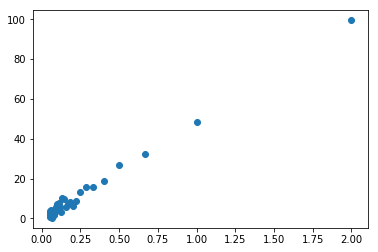

In [16]:
#We want to find out how much force the curler is applying, but it's kind of difficult to tell just by 
#looking at the curve above. Can we transform one of the variables to get something that looks a bit easier
#to work with? Well, if we take the recipriocal of mass (1/m) and call it x, we'll get a = Fx, which looks 
#awfully like the equation of a line! Let's try it out:

plt.scatter(1 / mass, acceleration)

Force: 49.82320955370261 Newtons


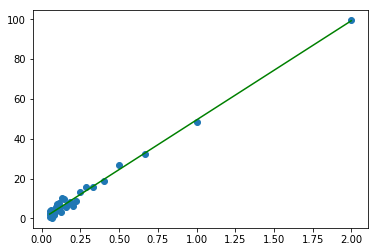

In [17]:
#Linearizing a function comes with benefits aside from just looking easier to work with. For instance, while 
#we'll save the details of this for the next lecture, we can plot a trendline and get the slope and intercept
#of this line.

plt.scatter(1 / mass, acceleration)

F, b = np.polyfit(1 / mass, acceleration, 1)
abline_values = [F * x + b for x in 1 / mass]
plt.plot(1 / mass, abline_values, 'g')

print("Force:", F, "Newtons") 

#The slope of the line corresponds to approximately 50 Newtons or 11 pounds of force. Pretty neat. In case 
#you're interested, we've posted an optional link to a discussion on other fun facts and calculations 
#regarding curling (http://www.madsci.org/posts/archives/2007-09/1190770482.Ph.r.html). So, to recap, 
#transformations allow us to linarize functions, which may be easier to manipulate, or allow us to 
#extrapolate other details of interest. 

### Transformations: Making life easier (or harder)?

In [18]:
#Now, at this point, you might be thinking that transformations feel a bit "unnatural" or that it's not quite 
#clear what technique to use, when. But, transformations do often work well in practice, and you'll gain
#intuition as we work through more examples throughout this course. In fact, I'll bet you were probably 
#familiar with this concept even before this lecture. For instance, many real-life scales involve 
#transformations, such as: the pH scale (used for measuring acidity levels), the Richter scale used for 
#measuring the magnitude of an earthquake (although the modern standard is actually the moment-magnitude scale), 
#and the decibel scale used for measuring sound levels. 

Decibel Scale:

| Source of Sound                          | Sound Pressure ($\mu$Pa)  | Decibels  |
| ---------------------------------------- |:-------------------------:| ---------:|
| Launching of a space shuttle	           |     2,000,000,000         |   180     |
| Full symphony orchestra	               |       2,000,000           |   100     |
| High speed diesel freight train at 25 m  |         200,000           |    80     |
| Normal conversation	                   |          20,000           |    60     |
| Soft whispering at 2m in a library       |           2,000           |    40     |
| Unoccupied broadcast studio              |            200            |    20     |
| Threshold of hearing                     |             20	           |     0     |

Adapted from: https://www.epd.gov.hk/epd/noise_education/web/ENG_EPD_HTML/m1/intro_5.html

In [19]:
#Now, you might notice that the regions we've chosen involves a bit of subjectivity. For instance, the Great

#Note that the extreme range of values, like sound pressure in this case (measured in micropascals), is 
#rather inconvinient to talk about, because it spans several orders of magnitude. That's why we discuss how 
#loud sound is in terms of decibels. With that said, it's important to note that going from 40 decibels to 
#80 decibels does NOT mean that the source becomes twice as loud. Since the scale is log transformed, the 
#difference is actually 100-fold! That's equivalent to going from a soft whisper to having a diesel freight 
#train chugging away nearby.

#QUIZ: Given pH formula (written in exponential form), apply (inverse) transformation to get pH and determine 
#substance. (multiple choice: https://en.wikipedia.org/wiki/PH). Would also work for Richter scale (magnitude 
#of displacement, but formula is a tad more complex. Physical concept is more intuitive though.)

### Case Study: New York Stock Exchange

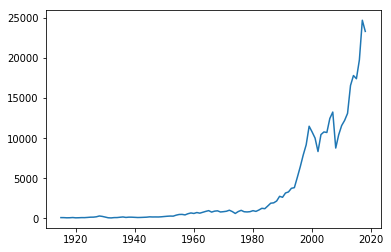

In [20]:
#We'll end this lecture by going through a case study. The following data are the closing values for the Dow
#Jones Industrial Average (DJIA), a stock market index of 30 large, publicly owned companies based in the US
#from 1915 to 2018. Note that the most recent global 2008 recession is clearly depicted. Can you identify any 
#other recessions? How we would identify periods of economic downturn or stagnation in general?

#[EXERCISE] (Ask students the question: could prompt students, blank text box for brainstorm)

#Data obtained from https://www.macrotrends.net/1319/dow-jones-100-year-historical-chart 
years = np.arange(1915, 2019, 1) 
closing_values = [99.15, 95.00, 74.38, 82.20, 107.23, 71.95, 80.80, 98.17, 95.52, 120.51, 151.08, 157.20, 200.70, 300.00, 
                  248.48, 164.58, 77.90, 59.93, 99.90, 104.04, 144.13, 179.90, 120.85, 154.76, 150.24, 131.13, 110.96, 119.40, 
                  135.89, 152.32, 192.91, 177.20, 181.16, 177.30, 200.13, 235.41, 269.23, 291.90, 280.90, 404.39, 488.40, 
                  499.47, 435.69, 583.65, 679.36, 615.89, 731.14, 652.10, 762.95, 874.13, 969.26, 785.69, 905.11, 943.75, 
                  800.36, 838.92, 890.20, 1020.02, 850.86, 616.24, 852.41, 1004.65, 831.17, 805.01, 838.74, 963.99, 875.00, 
                  1046.54, 1258.64, 1211.57, 1546.67, 1895.95, 1938.83, 2168.57, 2753.20, 2633.66, 3168.83, 3301.11, 3754.09, 
                  3834.44, 5117.12, 6448.27, 7908.30, 9181.43, 11497.12, 10787.99, 10021.57, 8341.63, 10453.92, 10783.01, 
                  10717.50, 12463.15, 13264.82, 8776.39, 10428.05, 11577.51, 12217.56, 13104.14, 16576.66, 17823.07, 17425.03, 
                  19762.60, 24719.22, 23327.46]

plt.plot(years, closing_values)

|          Crowds outside NYSE after crash       | "Bank runs"       |
|:-----------------:| :------------------------: |
|  ![Crowds outside NYSE](Crowd_NYSE.jpg)        | ![American Union Bank](American_Union_Bank.png)|

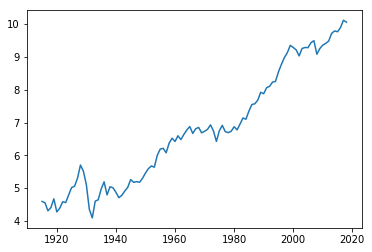

In [21]:
#Now, you might notice that the regions we've chosen involves a bit of subjectivity. For instance, the Great

#For those of you who are familiar with US history, you may know that there was a severe worldwide economic 
#downturn in the 1930s, after WWI and before the start of WWII. The unemployment rate reached 25%, banks 
#began to fail, and a swaths of people lined up to withdraw whatever savings they had left, as depicted
#above. The "Great Depression", as it's called, doesn't seem to appear in our plot though. Why is that?

#For starters, the Dow Jones used to be measured in the hundereds, whereas in modern times, we're talking 
#about tens of thousands of points. Just the daily fluctuations might exceed a hundred points, thereby 
#obscuring all the details in the left-hand region of the plot. Since the rates of change seem to be 
#proportional to the index's current value, it might be worth exploring a logarithmic transformation. 
#Let's see what happens when we do that:

log_closing_values = np.log(closing_values)
plt.plot(years, log_closing_values)

#Now, you might notice that the regions we've chosen involves a bit of subjectivity. For instance, the Great

#Voila! Now the Great Depression is clearly visible. Even though a change of 30 points may seem minisciule 
#nowadays, on October 29, 1929, or "Black Tuesday", this was a 12% decrease, which accounts for a significant 
#portion of that giant dropoff in the left-hand side of the graph. Note that there are a few other periods 
#where the market seems to stagnate, and while it's still difficult to precisely pinpoint every major 
#recession, we are able to make out a lot more intricacies of the data, whereas this was all shrouded before
#we applied the transformations.

### Which transformation should I choose?

- Not a "one size fits all" process, should start by exploring your data 
- Normalizing data is a common and sometimes necessary transformation for applying later steps in a statistical pipeline
- Can sometimes reduce skewness by applying square/square root transformations (Nia will come back to this in the context of histograms in week 2!)
- Reciprocal and logarithmic transformation are other useful transformations to know
- These transformations have visual effects: the right choice might make analysis easier or emphasize different features of the data
- Very useful resource for much of the information in this lecture http://fmwww.bc.edu/repec/bocode/t/transint.html
- In the next section, we'll look at some ways to spruce up our graphs (previewed here), such as drawing trendlines, highlighting regions, etc.